In [25]:
import xml.etree.ElementTree as ET
import cv2
import os

import matplotlib.pyplot as plt

In [63]:
tree = ET.parse("./data/annotations/maksssksksss1.xml")

In [64]:
root = tree.getroot()

In [65]:
def mark_face(img, object_list):
    for obj in object_list:
        box = obj.find('bndbox')
        xmin, ymin = int(box.find('xmin').text), int(box.find('ymin').text)
        xmax, ymax = int(box.find('xmax').text), int(box.find('ymax').text)
        
        img = cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    return img
        

root_folder = r'C:\Users\v.raveendran\PycharmProjects\yolo_face\data'
folder = root.find('folder').text
file = root.find('filename').text
object_list = root.findall('object')

image_path = os.path.join(root_folder, folder, file)

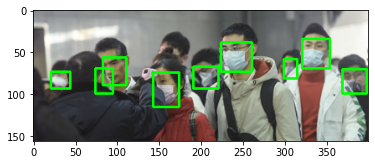

In [66]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img = mark_face(img, object_list)
plt.imshow(img)

In [42]:
list(map(lambda x: x.text, root.find('object').find('bndbox')))

['79', '105', '109', '142']

In [38]:
list(root)

[<Element 'folder' at 0x00000261ECCB8F98>,
 <Element 'filename' at 0x00000261ECCBE048>,
 <Element 'size' at 0x00000261ECCBE0E8>,
 <Element 'segmented' at 0x00000261ECCBE228>,
 <Element 'object' at 0x00000261ECCBE278>,
 <Element 'object' at 0x00000261ECCBE5E8>,
 <Element 'object' at 0x00000261ECCBE958>]

In [72]:
img_height = []
img_width = []

folder = r'C:\Users\v.raveendran\PycharmProjects\yolo_face\data\images'
for item in os.listdir(folder):
    img = cv2.imread(os.path.join(folder, item))
    height, width, channels = img.shape
    img_height.append(height)
    img_width.append(width)

(array([ 14., 187., 251.,  87.,  15., 293.,   1.,   3.,   0.,   2.]),
 array([156. , 200.4, 244.8, 289.2, 333.6, 378. , 422.4, 466.8, 511.2,
        555.6, 600. ]),
 <BarContainer object of 10 artists>)

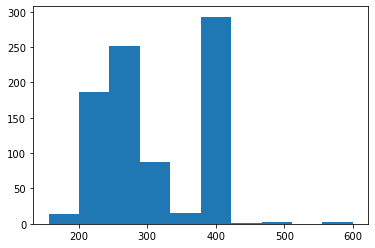

In [73]:
plt.hist(img_height)

(array([  3.,  53., 196.,   6.,   5., 570.,   2.,  11.,   0.,   7.]),
 array([193. , 233.7, 274.4, 315.1, 355.8, 396.5, 437.2, 477.9, 518.6,
        559.3, 600. ]),
 <BarContainer object of 10 artists>)

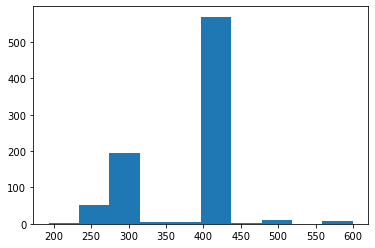

In [74]:
plt.hist(img_width)